<a href="https://colab.research.google.com/github/babupallam/Supervised-Learning-Regression-Algorithms/blob/main/04_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

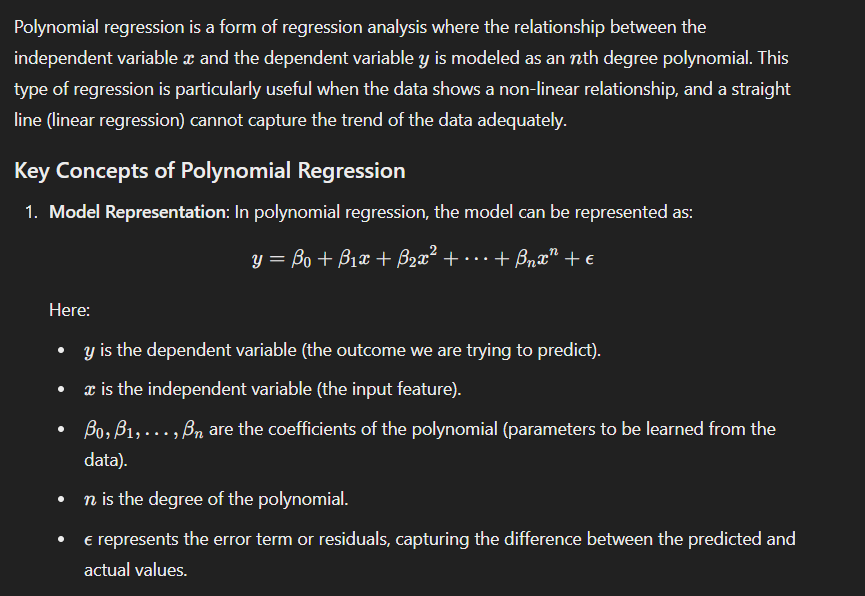


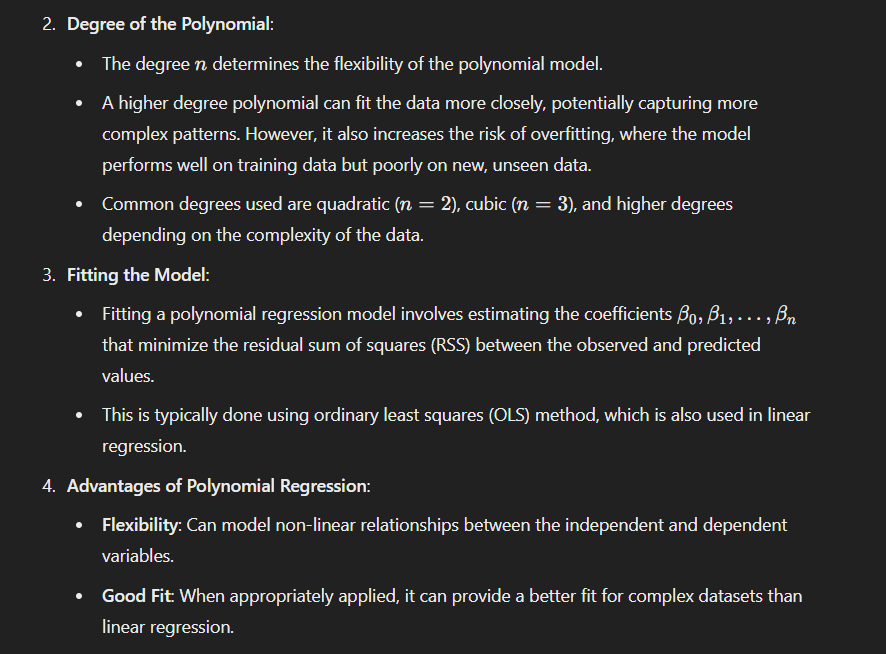

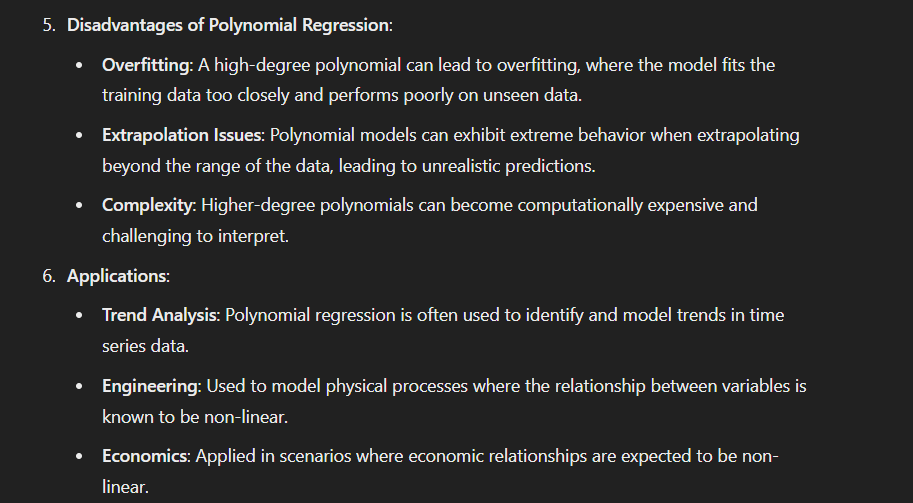

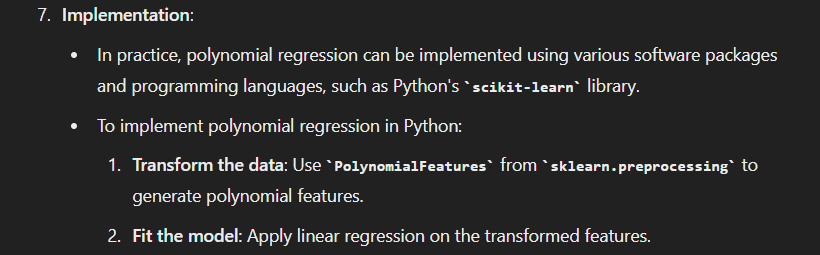



# Demo of the Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


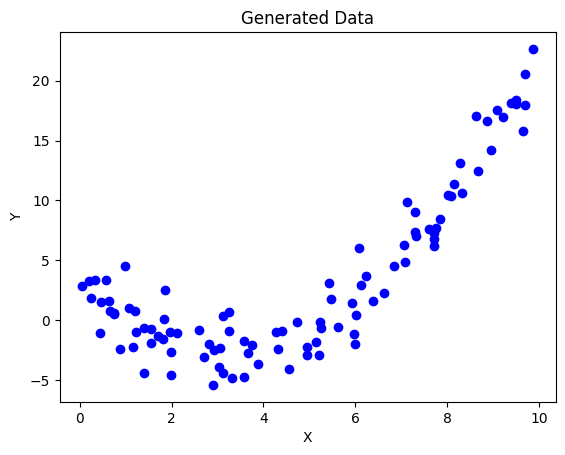

In [4]:
# Generate Synthetic Data

# Seed for reproducibility
np.random.seed(42)

# Generate 100 random points between 0 and 10
x = np.random.rand(100, 1) * 10
# Generate a quadratic relationship with some noise
y = 2 - 3 * x + 0.5 * x**2 + np.random.randn(100, 1) * 2

# Visualize the generated data
plt.scatter(x, y, color='blue')
plt.title('Generated Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [5]:
# Transform the Data to Include Polynomial Features

# Transform the features to include polynomial terms (degree=2)
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)


In [6]:
# Fit the Polynomial Regression Model

# Fit the polynomial regression model
model = LinearRegression()
model.fit(x_poly, y)

# Predict the y values
y_poly_pred = model.predict(x_poly)


In [7]:
# Evaluate the Model

# Calculate metrics
mse = mean_squared_error(y, y_poly_pred)
r2 = r2_score(y, y_poly_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error (MSE): 3.11
R^2 Score: 0.93


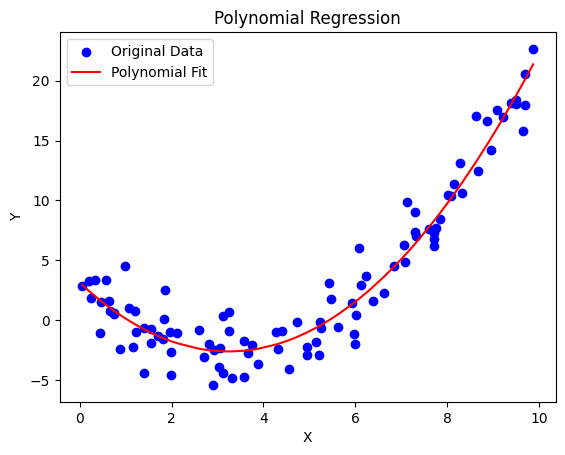

In [9]:
# Visualize the Results

# Sort the values of x for better plotting
sort_axis = np.argsort(x.flatten())
x_sorted = x[sort_axis]
y_poly_pred_sorted = y_poly_pred[sort_axis]

# Plot the results
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x_sorted, y_poly_pred_sorted, color='red', label='Polynomial Fit')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [14]:
# Prediction for new inputs

# Example new inputs
x_new = np.array([[1.5], [3.2], [7.8]])

# Transform the new input data
x_new_poly = polynomial_features.transform(x_new)

# Predict using the model
y_new_pred = model.predict(x_new_poly)


In [15]:
# Display the predictions
for i, (x_val, y_pred) in enumerate(zip(x_new, y_new_pred)):
    print(f"Input X = {x_val[0]} => Predicted Y = {y_pred[0]:.2f}")


Input X = 1.5 => Predicted Y = -0.96
Input X = 3.2 => Predicted Y = -2.62
Input X = 7.8 => Predicted Y = 8.72


# Application 1: MPG Prediction in Cars

. Use a dataset that relates car engine size (in liters) and car weight (in kilograms) to the fuel consumption (miles per gallon or MPG). The goal is to predict a car's MPG based on its engine size and weight using polynomial regression.

In [17]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
# create synthetic dataset

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data
engine_size = np.random.rand(100, 1) * 3 + 1  # Engine size between 1 and 4 liters
car_weight = np.random.rand(100, 1) * 1500 + 1000  # Car weight between 1000 and 2500 kg
mpg = 50 - 5 * engine_size - 0.01 * car_weight + np.random.randn(100, 1) * 2  # Add some noise

# Combine engine size and car weight into a single feature matrix
X = np.hstack((engine_size, car_weight))
y = mpg

# Convert to a DataFrame for easier handling
df = pd.DataFrame(data=np.hstack((X, y)), columns=['Engine Size (L)', 'Car Weight (kg)', 'MPG'])

# Display the first few rows of the dataset
print(df.head())


   Engine Size (L)  Car Weight (kg)        MPG
0         2.123620      1047.143779  27.550411
1         3.852143      1954.615617  11.657637
2         3.195982      1471.533972  19.890896
3         2.795975      1762.856037  16.962860
4         1.468056      2361.349711  22.777772


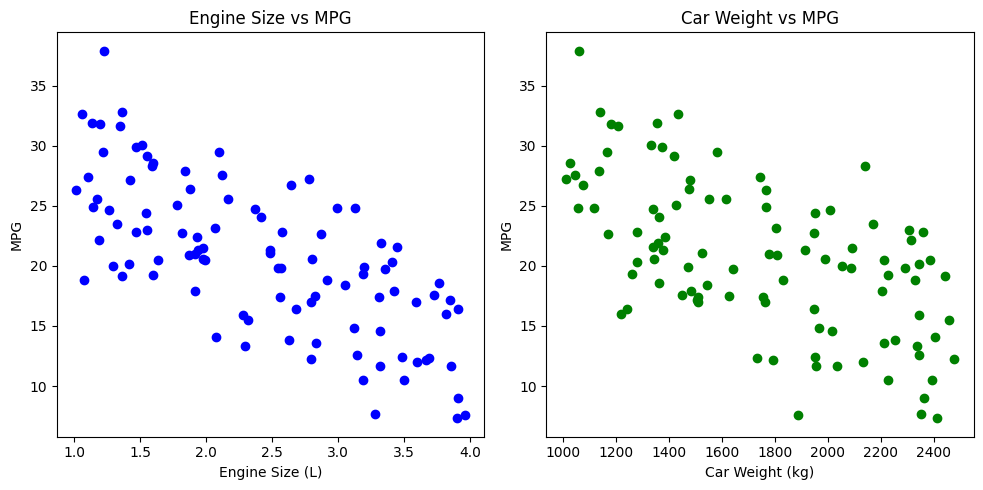

In [19]:
# visualize data

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Engine Size (L)'], df['MPG'], color='blue')
plt.title('Engine Size vs MPG')
plt.xlabel('Engine Size (L)')
plt.ylabel('MPG')

plt.subplot(1, 2, 2)
plt.scatter(df['Car Weight (kg)'], df['MPG'], color='green')
plt.title('Car Weight vs MPG')
plt.xlabel('Car Weight (kg)')
plt.ylabel('MPG')

plt.tight_layout()
plt.show()


In [20]:
# Transform the Features to Polynomial Features
# Create polynomial features with degree 2
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polynomial_features.fit_transform(X)


In [21]:
# Fit the Polynomial Regression Model

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict the MPG using the trained model
y_poly_pred = model.predict(X_poly)


In [22]:
# Evaluate the Model

# Calculate metrics
mse = mean_squared_error(y, y_poly_pred)
r2 = r2_score(y, y_poly_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error (MSE): 3.68
R^2 Score: 0.91


In [23]:
# Make Predictions for New Data

# New car data: Engine Size = 2.5L, Car Weight = 1500kg
X_new = np.array([[2.5, 1500]])

# Transform the new input data to polynomial features
X_new_poly = polynomial_features.transform(X_new)

# Predict using the model
y_new_pred = model.predict(X_new_poly)

print(f"Predicted MPG for a car with 2.5L engine and 1500kg weight: {y_new_pred[0][0]:.2f} MPG")


Predicted MPG for a car with 2.5L engine and 1500kg weight: 22.18 MPG


# Application 2: Prediction of  Diabetes

This dataset contains measurements related to diabetes progression in patients, and we'll predict the target variable (a quantitative measure of disease progression) based on other features.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [30]:
#  Load and Explore the Dataset

# Load the diabetes dataset
diabetes = load_diabetes()

# Convert to a pandas DataFrame for easier handling
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Display the first few rows of the dataset
print(df.head())

# The dataset includes several features like age, BMI, blood pressure, etc., and a target variable representing disease progression.





        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


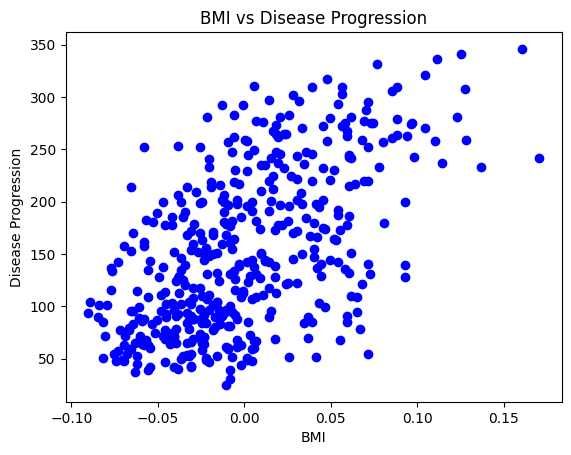

In [31]:
#Select Features and Target

# Select the feature and target variable
X = df[['bmi']].values  # Using BMI as the predictor
y = df['target'].values  # The target variable

# Visualize the relationship between BMI and the target
plt.scatter(X, y, color='blue')
plt.title('BMI vs Disease Progression')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.show()


In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Create Polynomial Features and Train the Model

# Create polynomial features (degree=2)
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict using the model
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)


In [34]:
# Evaluate the Model

# Evaluate the model on training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.2f}, R^2: {r2_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}, R^2: {r2_test:.2f}")


Training MSE: 3849.33, R^2: 0.37
Testing MSE: 4085.03, R^2: 0.23


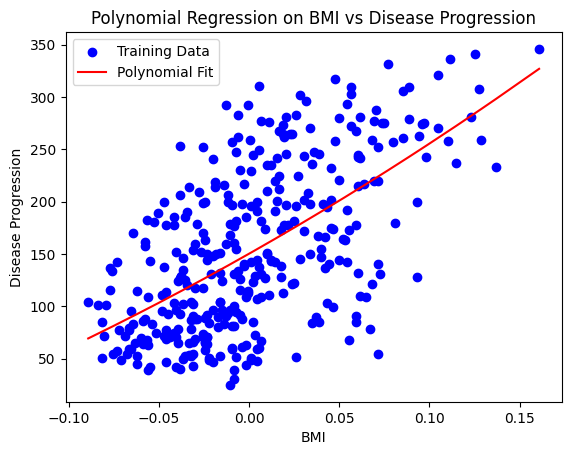

In [35]:
# Visualize the Results

# Sort the training data for better visualization
sort_axis = np.argsort(X_train.flatten())
X_train_sorted = X_train[sort_axis]
y_train_pred_sorted = y_train_pred[sort_axis]

# Plot the results
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train_sorted, y_train_pred_sorted, color='red', label='Polynomial Fit')
plt.title('Polynomial Regression on BMI vs Disease Progression')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()


In [36]:
#Sample Input

import numpy as np

# Sample BMI values for prediction
sample_bmi = np.array([[0.03], [0.05], [0.1], [0.15], [0.2]])


In [37]:
# Transform the sample BMI values using the polynomial features
sample_bmi_poly = polynomial_features.transform(sample_bmi)


In [38]:
# Predict disease progression using the trained model
sample_predictions = model.predict(sample_bmi_poly)

# Display the predictions
for bmi, prediction in zip(sample_bmi, sample_predictions):
    print(f"BMI = {bmi[0]} => Predicted Disease Progression = {prediction:.2f}")


BMI = 0.03 => Predicted Disease Progression = 180.29
BMI = 0.05 => Predicted Disease Progression = 201.02
BMI = 0.1 => Predicted Disease Progression = 255.51
BMI = 0.15 => Predicted Disease Progression = 313.82
BMI = 0.2 => Predicted Disease Progression = 375.95
